<a href="https://colab.research.google.com/github/GuCuChiara/Basic-Glucose-prediction-Keras/blob/main/Basic_Glucose_prediction_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#montamos nuestra unidad de google drive
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [3]:
#importamos las librerías necesarias
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/machine learning proyects/Basic Glucose prediction Keras/gluc_conversion.csv')

#vemos una previa de nuestro archivo csv a entrenar:
print(f"La tabla gluc_conversion tiene {len(df)} registros")

print(df.head(10))
print(df.columns)

La tabla gluc_conversion tiene 57 registros
   mmol_L  mg_dl
0     0.6     10
1     0.8     15
2     1.1     20
3     1.4     25
4     1.7     30
5     1.9     35
6     2.2     40
7     2.5     45
8     2.8     50
9     3.1     55
Index(['mmol_L', 'mg_dl'], dtype='object')


In [4]:
#Definimos los valores de x e y
x=df["mmol_L"]
y=df["mg_dl"] # variable dependiente

In [5]:
import keras
import keras.backend as kb
import tensorflow as tf

In [6]:
tf_version = f'Versión de tensorflow: {tf.__version__}'
keras_version = f'Versión de keras: {keras.__version__}' 
print(tf_version)
print(keras_version)

Versión de tensorflow: 2.11.0
Versión de keras: 2.11.0


##Estructura y características de nuestra red neuronal:

**Características:**
* 3 capas ocultas, con activación ReLu
* 1 capa de salida

**Función de activación:**
* La función de activación se encarga de devolver una salida a partir de un valor de entrada, normalmente el conjunto de valores de salida en un rango determinado como (0,1) o (-1,1).

**Learning rate:**
* El learning rate nos dice que tanto actualizamos los pesos en cada iteración, en un rango de 0 a 1.
* Cada que se realiza una iteración en el proceso de entrenamiento se deben actualizar los pesos de la entrada para poder dar cada vez una mejor aproximación.

**Epocas(epoch):**
Cada ciclo de corrección, con propagación hacia adelante y hacia adtrás de TODOS los valores de entrenamiento para reducir la pérdida, se denomina época. 

* la propagación hacia atrás consiste en determinar las mejores ponderaciones y sesgos de entrada para obtener un resultado más preciso o "minimizar la pérdida"
* El algoritmo ajusta cada ponderación para minimizar la diferencia entre el valor calculado y el valor correcto. 
* El término "propagación hacia atrás" procede del hecho de que el algoritmo retrocede y ajusta las ponderaciones y los sesgos después de calcular una respuesta.
* Cuanto menor sea la pérdida para una red, más precisa será.

**Loss:**
* loss es un concepto central en Deep Learning que representa la penalización de una mala predicción.
* Es decir, **loss** es un número que indica cuan mala ha sido una predicción en un ejemplo concreto (si la predicción del modelo es perfecta, la loss es cero).

**Adam (Adaptive Moment Estimation):**
* La optimización de Adam es un método de descenso de gradiente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden.

* Según Kingma et al., 2014, el método es "computacionalmente eficiente, requiere poca memoria, es invariable al cambio de escala diagonal de gradientes y es adecuado para problemas que son grandes en términos de datos/parámetros".

**Hiperparámetros:**
* Los hiperparámetros son **parámetros ajustables** que permiten controlar el proceso de entrenamiento de un modelo. 
* Por ejemplo, con redes neuronales, puede decidir el número de capas ocultas y el número de nodos de cada capa. 
* El rendimiento de un modelo depende en gran medida de los hiperparámetros.

* El ajuste de hiperparámetros, también denominado optimización de hiperparámetros es el proceso de encontrar la configuración de hiperparámetros que produzca el mejor rendimiento. 
* Normalmente, el proceso es manual y costoso desde el punto de vista computacional.

**Métrica:**
* El último paso que nos queda es saber si la red ha funcionado correctamente. * Pero ¿Eso no se hacía con la función de coste? Pues no exactamente. La función de coste se usa para ayudar a ajustar los parámetros durante el entrenamiento mediante los datos de entrada pero no para saber si el modelo es bueno. 
* Para saber si el modelo es bueno , se usan las métricas.
* Las métricas son muy parecidas a las funciones de coste pero hay métricas que no existen como función de coste. El muchos casos la métrica será la misma que la función de coste.


**ReLU – Rectified Lineal Unit**

La función ReLU transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran.

 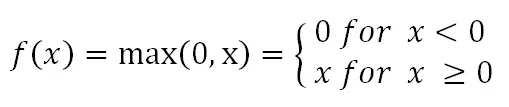

**Características de la función ReLU:**
* Activación Sparse – solo se activa si son positivos.
* No está acotada.
* Se pueden morir demasiadas neuronas.
* Se comporta bien con imágenes.
* Buen desempeño en redes convolucionales.

In [23]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)    #capa de salida
  ])

# optimizador https://keras.io/api/optimizers/adam/
# Available optimizers: https://keras.io/api/optimizers/

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) 

#compilación del modelo:
model.compile(loss='mean_squared_error', #función de pérdida
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error'])

In [25]:
# ajustamos el modelo y definomos la cantidad de épocas
history=model.fit(x,y, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 0.2685 - mean_absolute_error: 0.4406 - mean_squared_error: 0.2685
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 0.2745 - mean_absolute_error: 0.4435 - mean_squared_error: 0.2745
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 0.2797 - mean_absolute_error: 0.4439 - mean_squared_error: 0.2797
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 0.2818 - mean_absolute_error: 0.4558 - mean_squared_error: 0.2818
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 0.2779 - mean_absolute_error: 0.4476 - mean_squared_error: 0.2779
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 0.2885 - mean_absolute_error: 0.4578 - mean_squared_error: 0.2885
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 0.2682 - mean_absolute_error: 0.4396 - mean_squared_error: 0.2682
Epoch 8/500
2/2 [========================

In [26]:
#nos pide que ingresemos el valor de glucemia a predecir:
ingreso= float(input('Ingresa la glucemia en mmol/L:  ')) # definimos el valor que le vamos a pasar

# realizamos una predicción con el valor que ingresamos
prediccion= model.predict([ingreso])

print(f"prediccion con {ingreso} mmol/L == {prediccion} mg/dl")

Ingresa la glucemia en mmol/L:  22
1/1 [==============================] - 0s 66ms/step
prediccion con 22.0 mmol/L == [[396.13657]] mg/dl


2/2 [==============================] - 0s 6ms/step


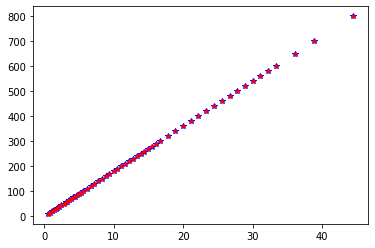

In [27]:
# Graficamos con matplotlib:
import matplotlib.pyplot as plt
#comparamos en azul la predicción, contra los valores reales en rojo
plt.plot(x,model.predict(x), 'b*', x,y, 'r.')

##Persistencia del modelo
Ahora que el modelo se ha entrenado puede guardarlo para un uso futuro a fin de evitar tener que volver a entrenarlo.

In [28]:
# Podemos guardar el modelo entrenado:
model.save('/content/gdrive/MyDrive/Colab Notebooks/machine learning proyects/Basic Glucose prediction Keras/gluc_conversion.h5')

## Cargar el modelo también resulta fácil con Keras, como se muestra a continuación:

In [29]:
from keras.models import load_model
pretrained_model = load_model('/content/gdrive/MyDrive/Colab Notebooks/machine learning proyects/Basic Glucose prediction Keras/gluc_conversion.h5')

In [30]:
#nos pide que ingresemos el valor de glucemia a predecir:
ingreso2= float(input('Ingresa la glucemia en mmol/L:  ')) # definimos el valor que le vamos a pasar

# realizamos una predicción con el valor que ingresamos
prediccion2= pretrained_model.predict([ingreso2])

print(f"prediccion con {ingreso2} mmol/L == {prediccion2} mg/dl")

Ingresa la glucemia en mmol/L:  22
1/1 [==============================] - 0s 73ms/step
prediccion con 22.0 mmol/L == [[396.13657]] mg/dl
